In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="darkgrid")

In [101]:
sensor_names = [f's_{i}' for i in range(1, 22)]  # 21 sensors (s_1 through s_21)

In [102]:
df_train = pd.read_csv('../data/loaded/train.csv')
df_test = pd.read_csv('../data/loaded/test.csv')

df_train.head()


,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [103]:
df_train.shape

(20631, 26)

In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_number  20631 non-null  int64  
 1   time_cycles  20631 non-null  int64  
 2   setting_1    20631 non-null  float64
 3   setting_2    20631 non-null  float64
 4   setting_3    20631 non-null  float64
 5   s_1          20631 non-null  float64
 6   s_2          20631 non-null  float64
 7   s_3          20631 non-null  float64
 8   s_4          20631 non-null  float64
 9   s_5          20631 non-null  float64
 10  s_6          20631 non-null  float64
 11  s_7          20631 non-null  float64
 12  s_8          20631 non-null  float64
 13  s_9          20631 non-null  float64
 14  s_10         20631 non-null  float64
 15  s_11         20631 non-null  float64
 16  s_12         20631 non-null  float64
 17  s_13         20631 non-null  float64
 18  s_14         20631 non-null  float64
 19  s_15

In [105]:
df_train.dtypes

unit_number      int64
time_cycles      int64
setting_1      float64
setting_2      float64
setting_3      float64
s_1            float64
s_2            float64
s_3            float64
s_4            float64
s_5            float64
s_6            float64
s_7            float64
s_8            float64
s_9            float64
s_10           float64
s_11           float64
s_12           float64
s_13           float64
s_14           float64
s_15           float64
s_16           float64
s_17             int64
s_18             int64
s_19           float64
s_20           float64
s_21           float64
dtype: object

In [106]:
for col in df_train.columns:
	if df_train[col].dtype != 'float64':
		df_train[col] = df_train[col].astype(float)

In [107]:
df_train.dtypes

unit_number    float64
time_cycles    float64
setting_1      float64
setting_2      float64
setting_3      float64
s_1            float64
s_2            float64
s_3            float64
s_4            float64
s_5            float64
s_6            float64
s_7            float64
s_8            float64
s_9            float64
s_10           float64
s_11           float64
s_12           float64
s_13           float64
s_14           float64
s_15           float64
s_16           float64
s_17           float64
s_18           float64
s_19           float64
s_20           float64
s_21           float64
dtype: object

In [108]:
df_train.describe()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [109]:
df_train.isnull().sum()

unit_number    0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64

In [110]:
df_train = df_train.drop(columns=['setting_2', 'setting_3'], axis=1)

In [111]:
df_train.boxplot(column='s_1')

<Axes: >

In [112]:
# Note: add_remaining_useful_life function is imported from handle_rul module in cell 19
# This cell calculates RUL for the training data

def add_remaining_useful_life(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate and add Remaining Useful Life (RUL) column to the dataframe.
    RUL = max_cycle_per_unit - current_cycle
    """
    grouped_by_unit = df.groupby(by='unit_number')
    max_cycle = grouped_by_unit['time_cycles'].max()
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_number', right_index=True)

    remaining_useful_life = result_frame['max_cycle'] - result_frame['time_cycles']
    result_frame['RUL'] = remaining_useful_life

    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

df_train = add_remaining_useful_life(df_train)
df_train[sensor_names+['RUL']].head()

,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,...,2388.02,8138.62,8.4195,0.03,392.0,2388.0,100.0,39.06,23.4190,191.0
1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,...,2388.07,8131.49,8.4318,0.03,392.0,2388.0,100.0,39.00,23.4236,190.0
2,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,...,2388.03,8133.23,8.4178,0.03,390.0,2388.0,100.0,38.95,23.3442,189.0
3,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,...,2388.08,8133.83,8.3682,0.03,392.0,2388.0,100.0,38.88,23.3739,188.0
4,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,...,2388.04,8133.80,8.4294,0.03,393.0,2388.0,100.0,38.90,23.4044,187.0


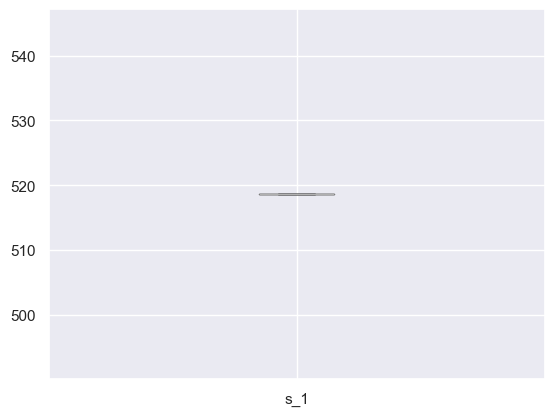

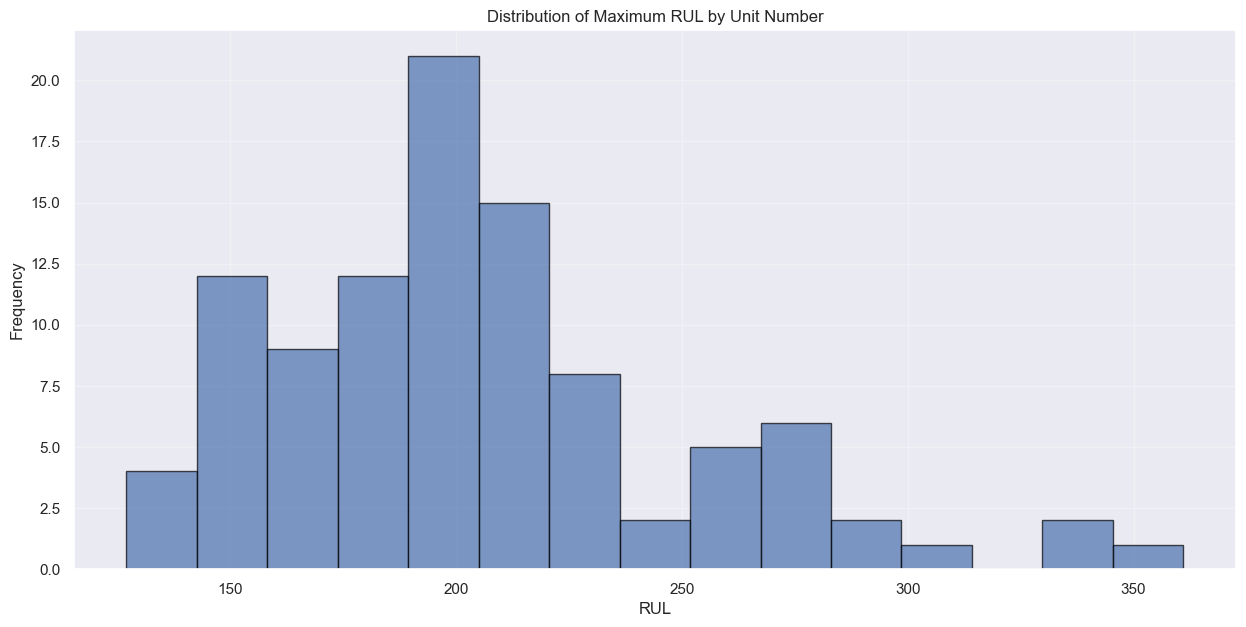

In [113]:
df_max_rul = df_train[['unit_number', 'RUL']].groupby('unit_number').max().reset_index()
plt.figure(figsize=(15, 7))
plt.hist(df_max_rul['RUL'], bins=15, edgecolor='black', alpha=0.7)
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum RUL by Unit Number')
plt.grid(True, alpha=0.3)
plt.show()

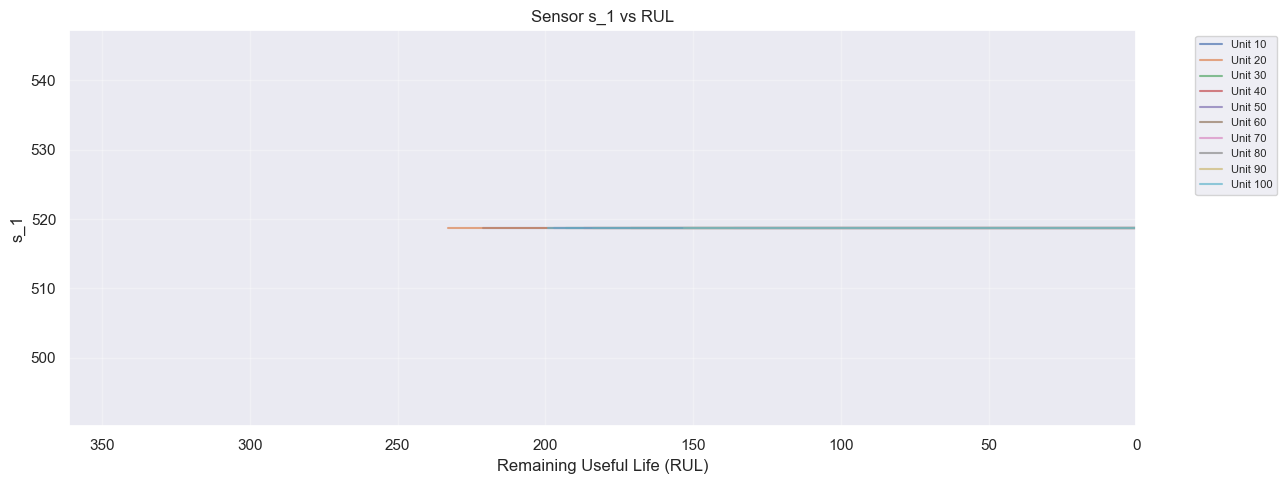

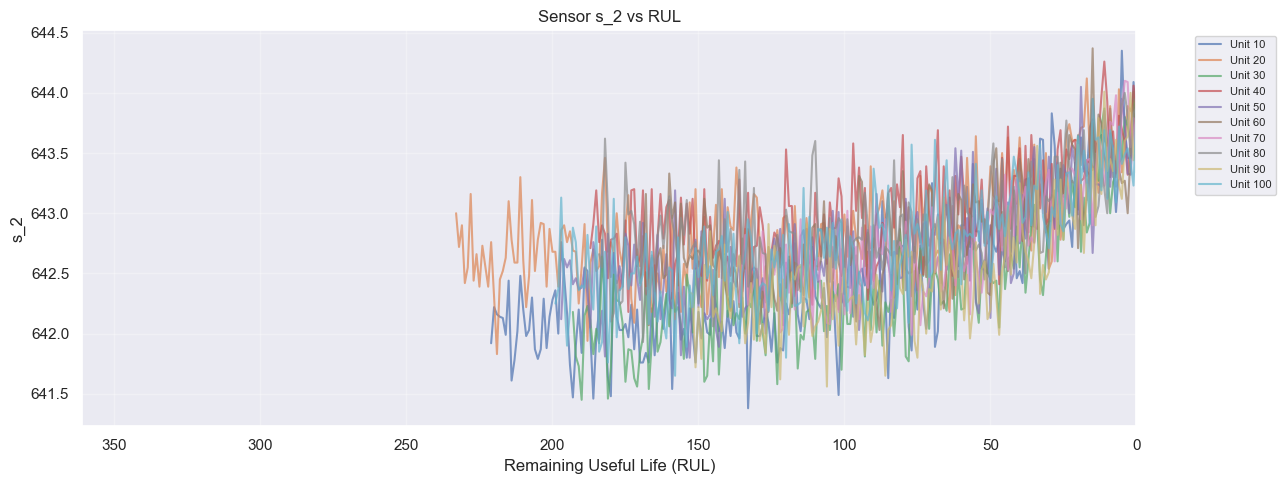

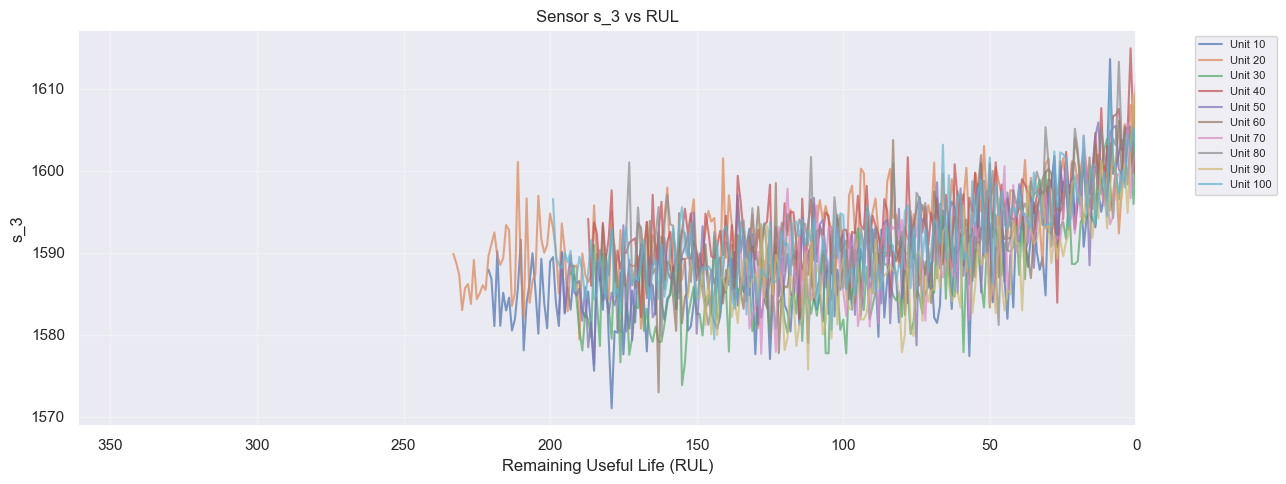

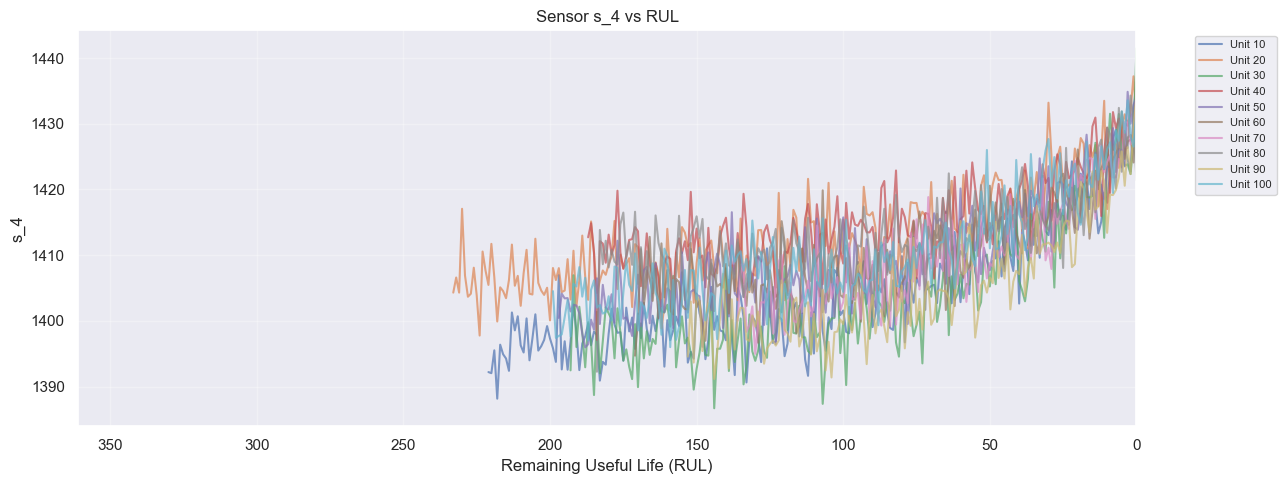

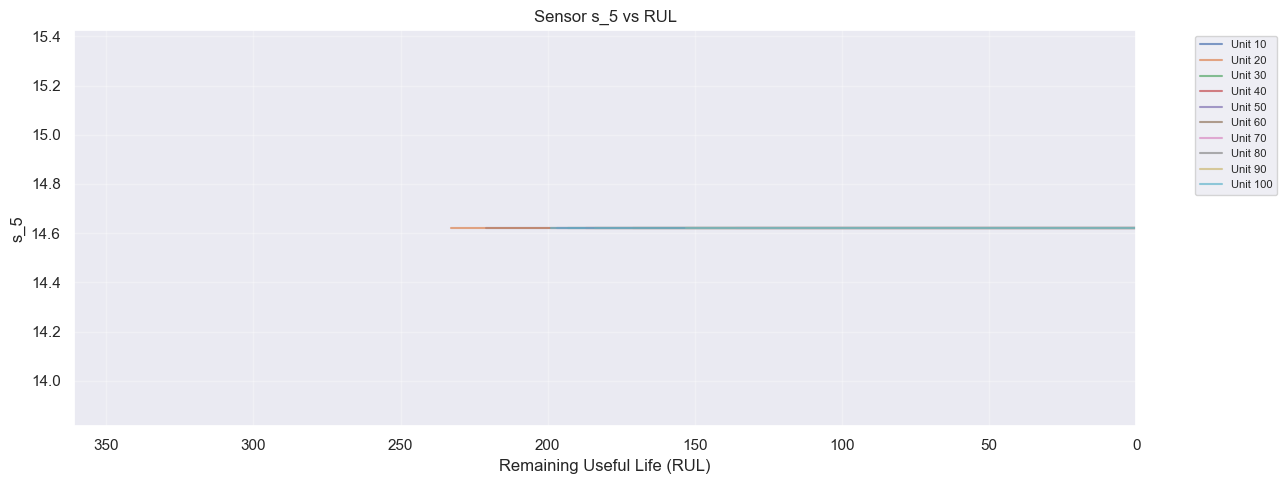

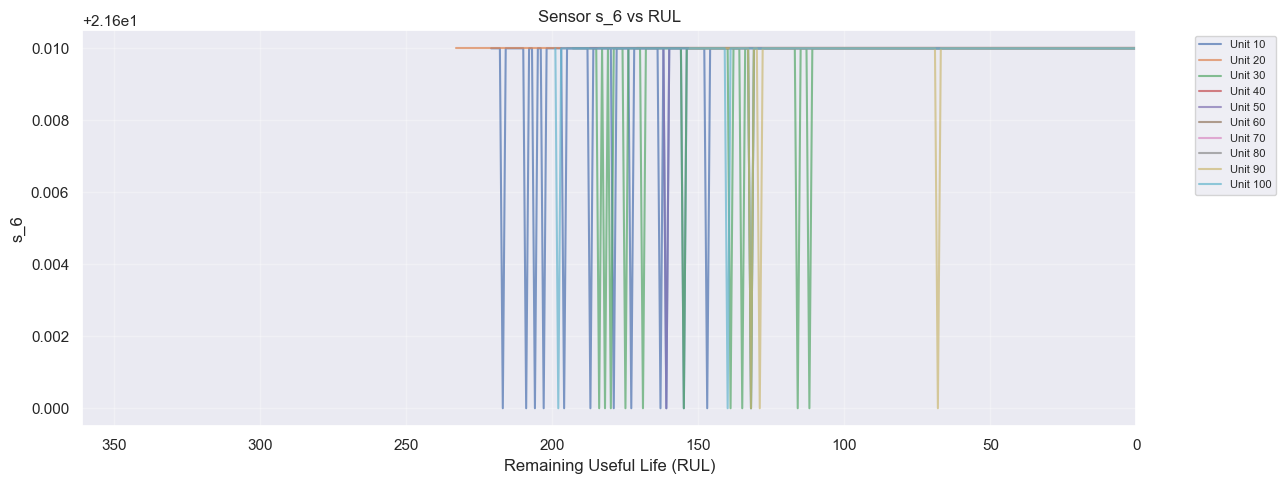

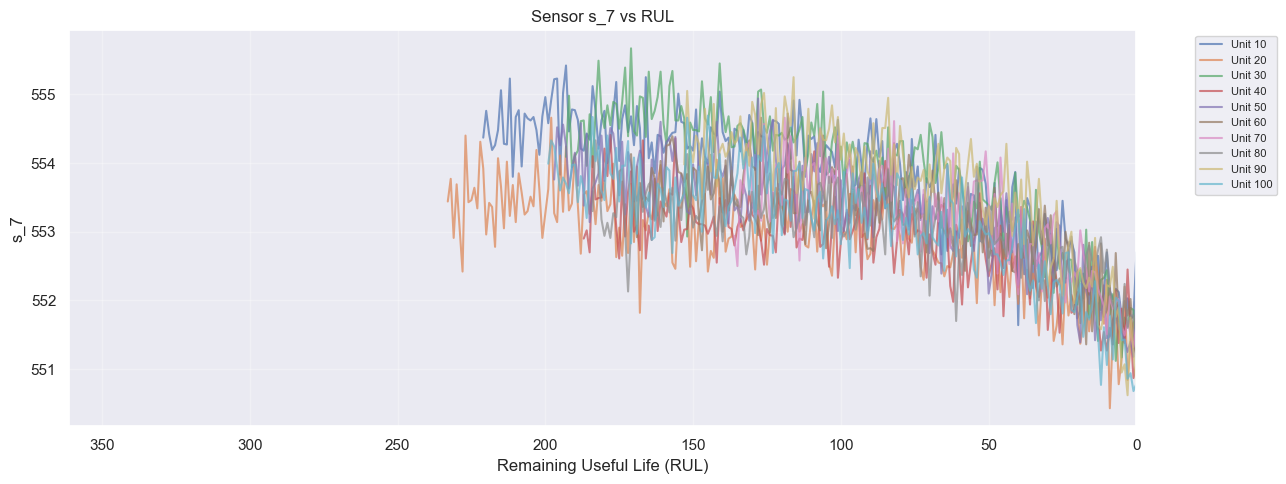

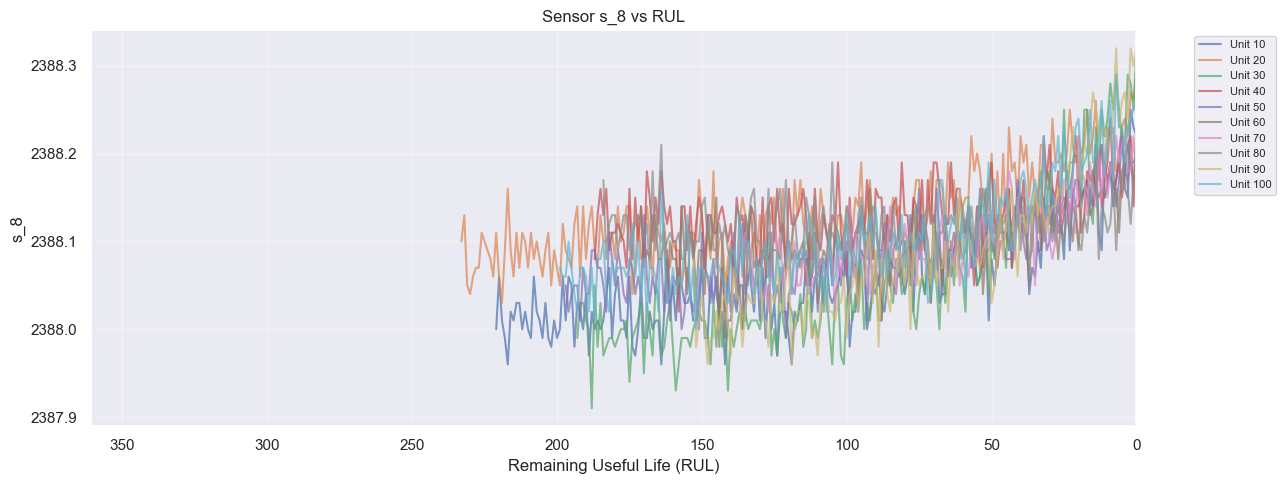

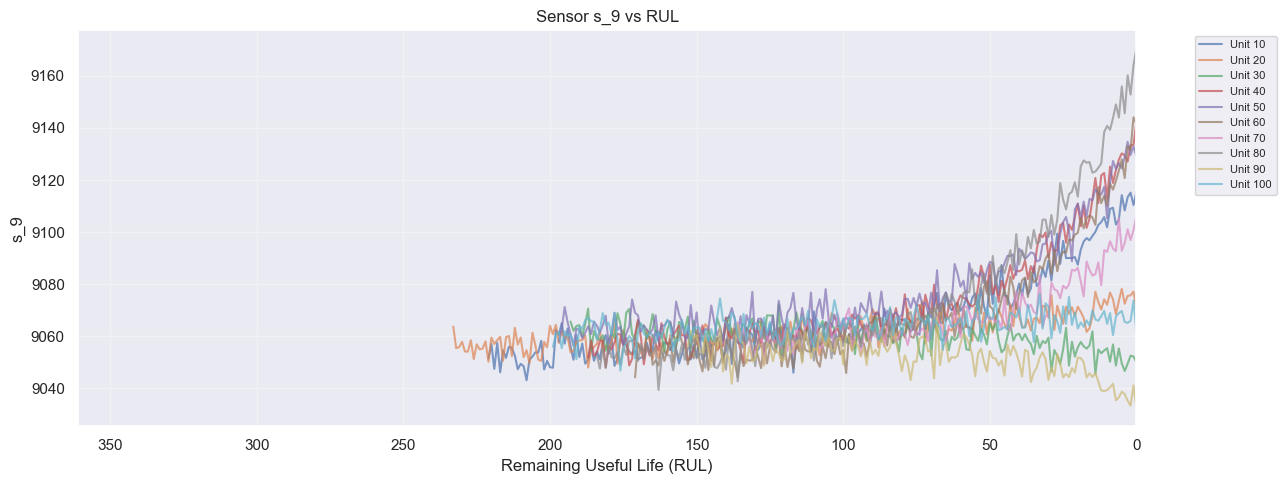

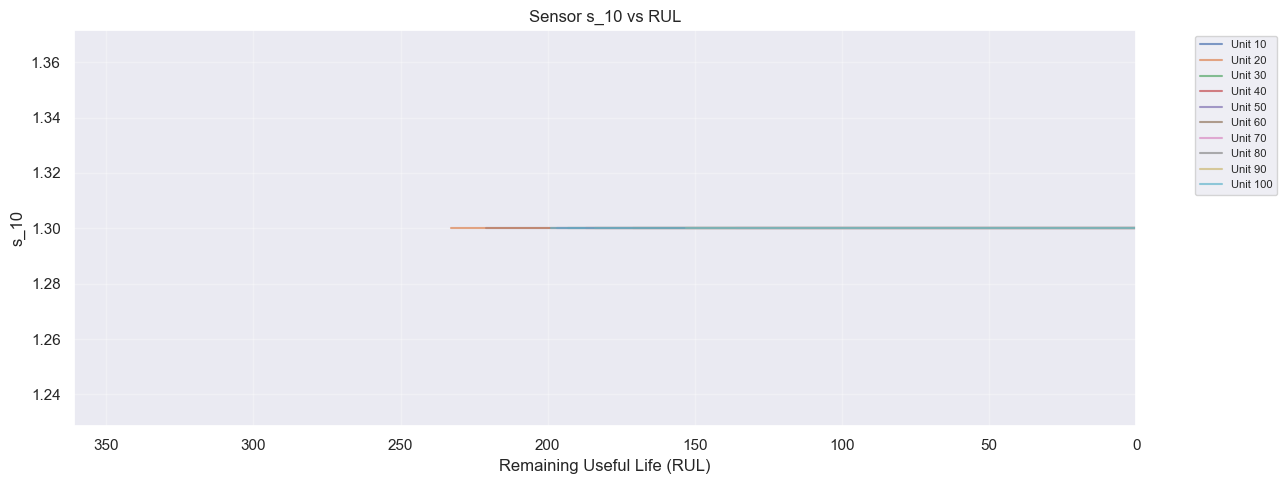

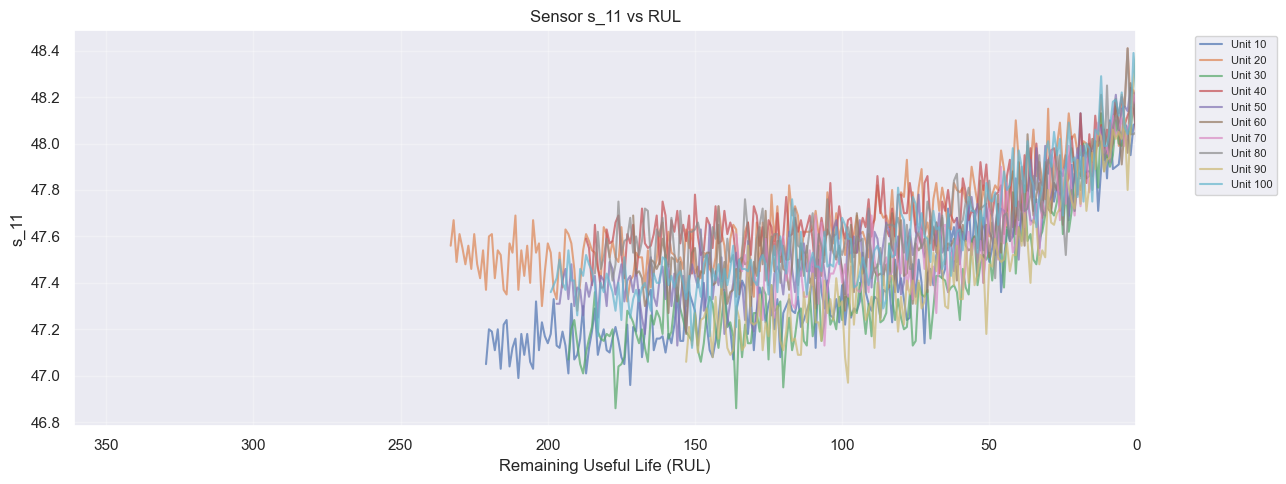

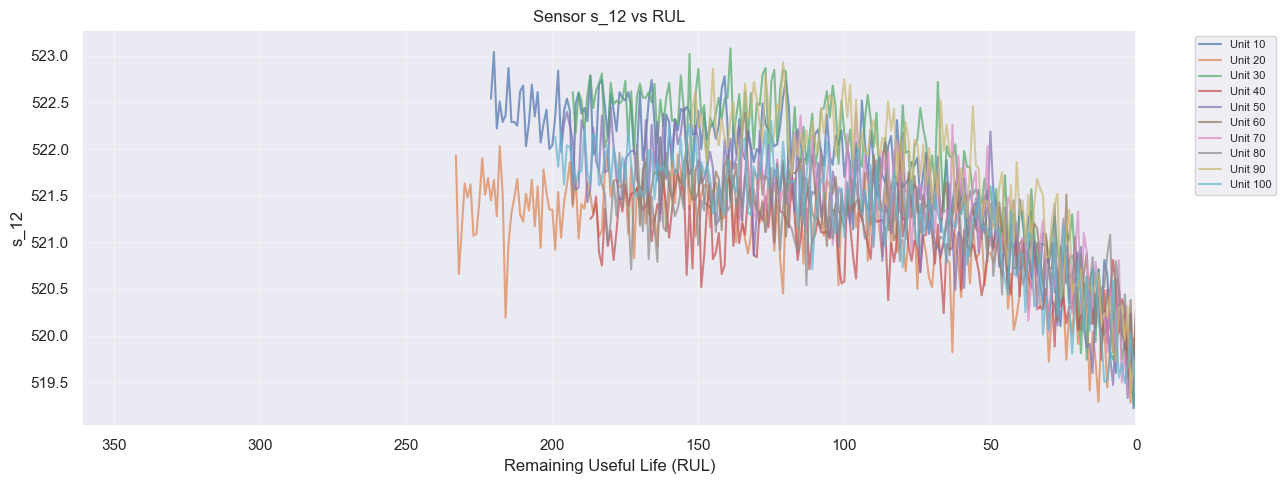

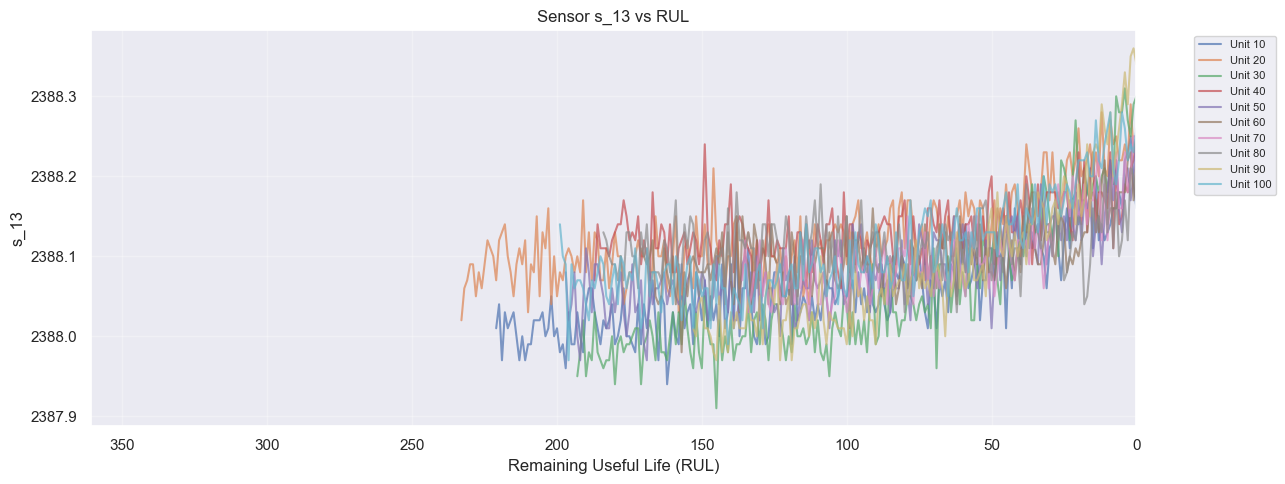

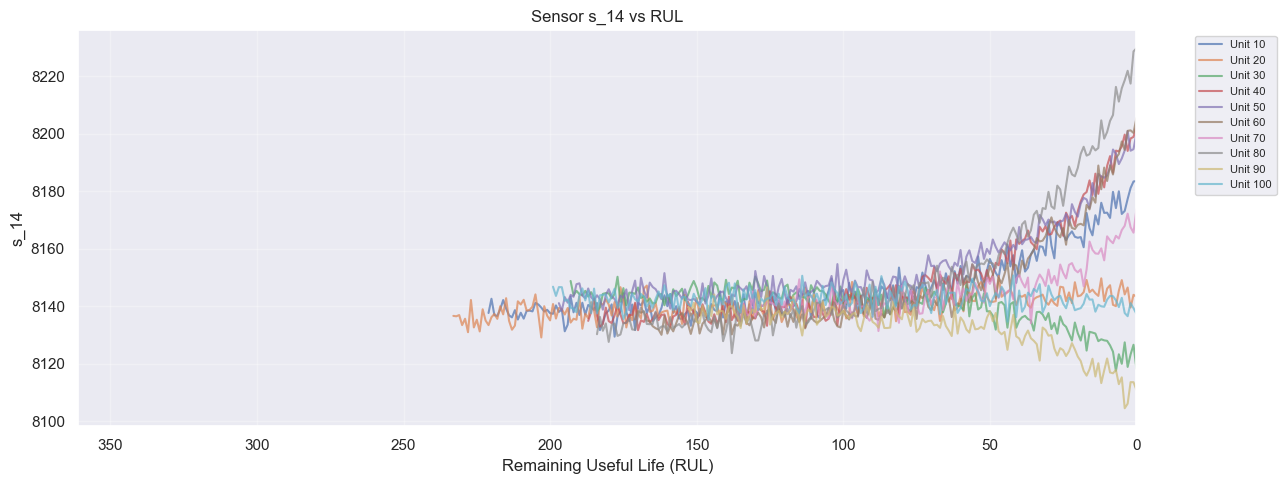

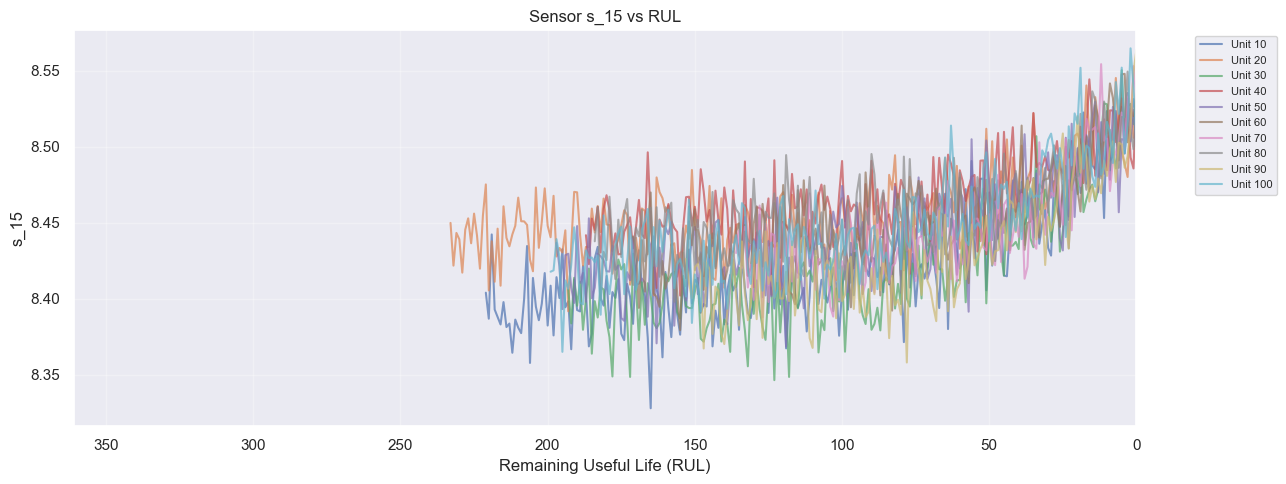

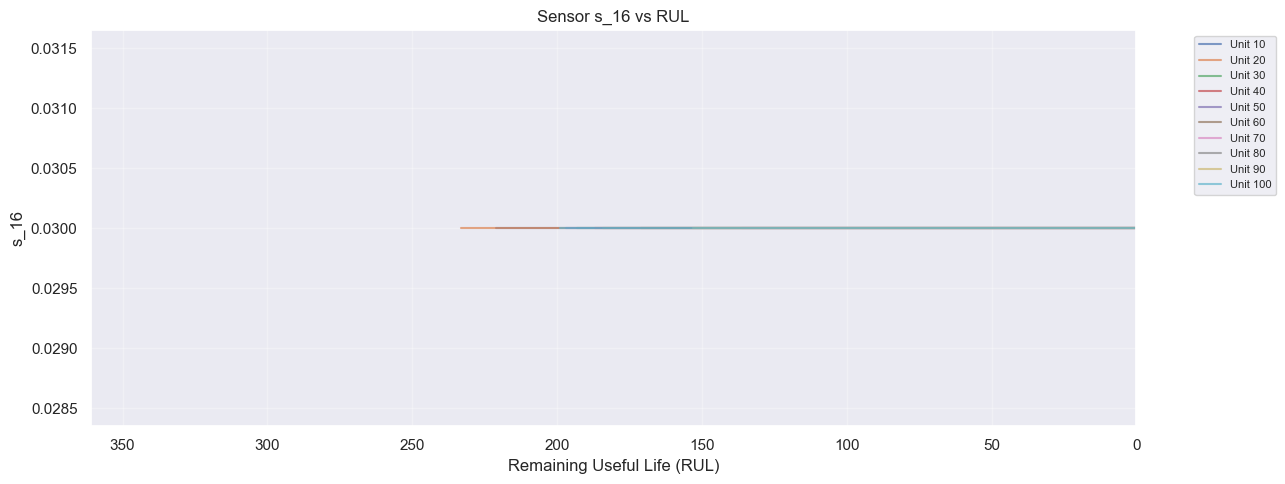

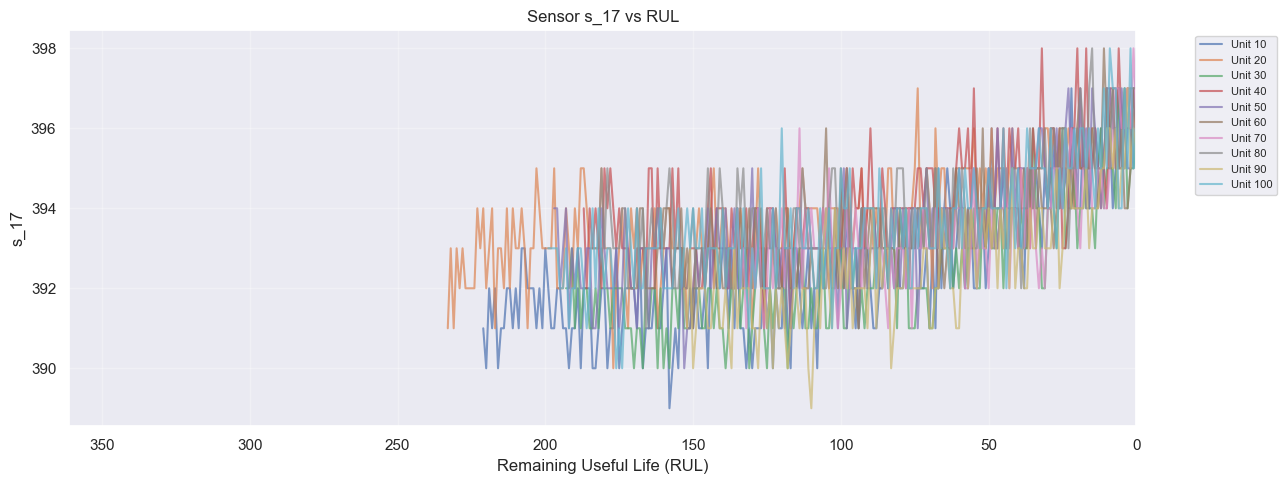

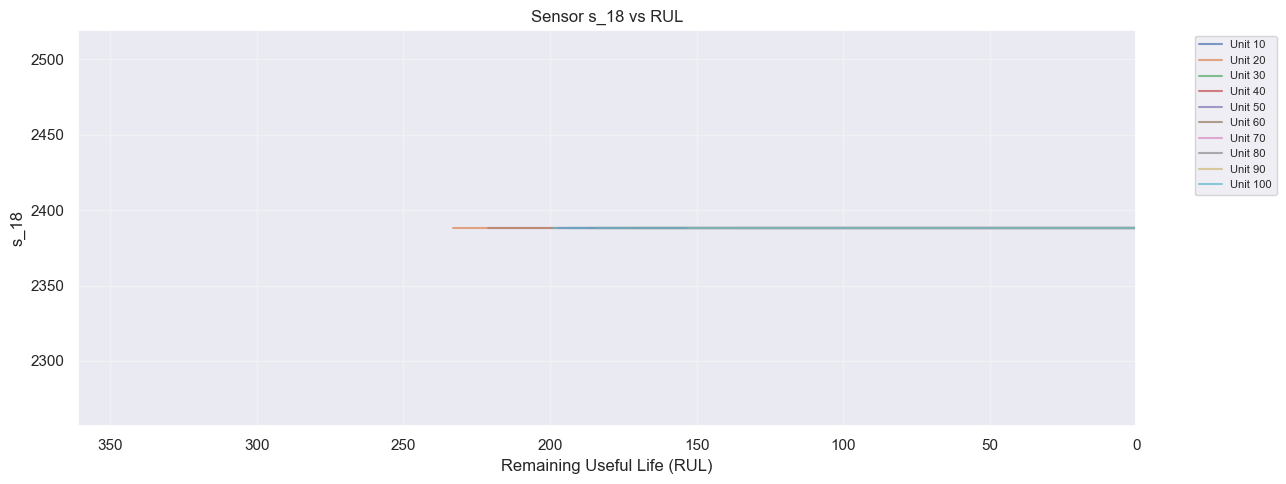

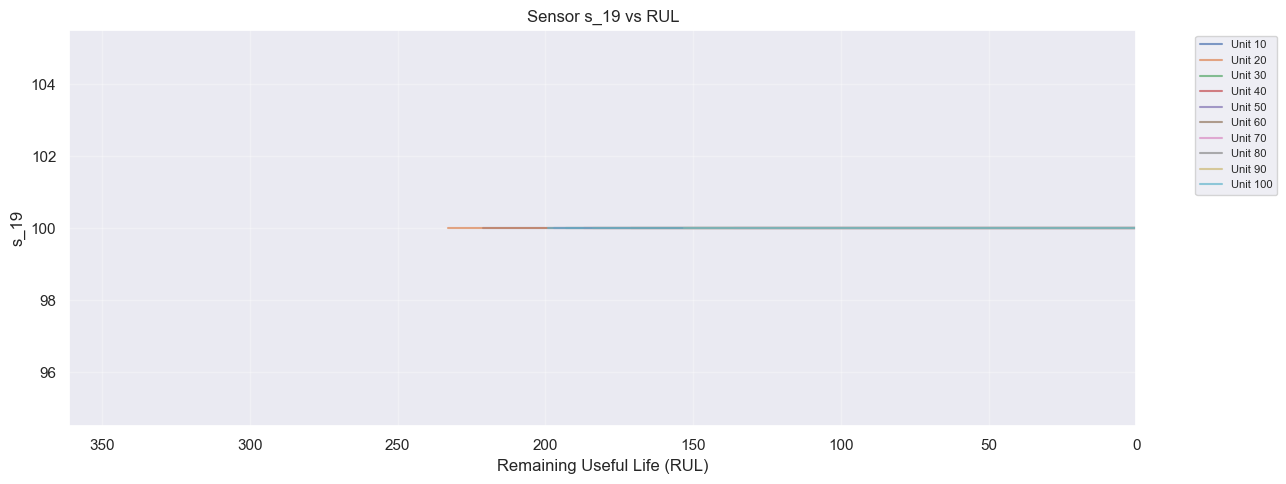

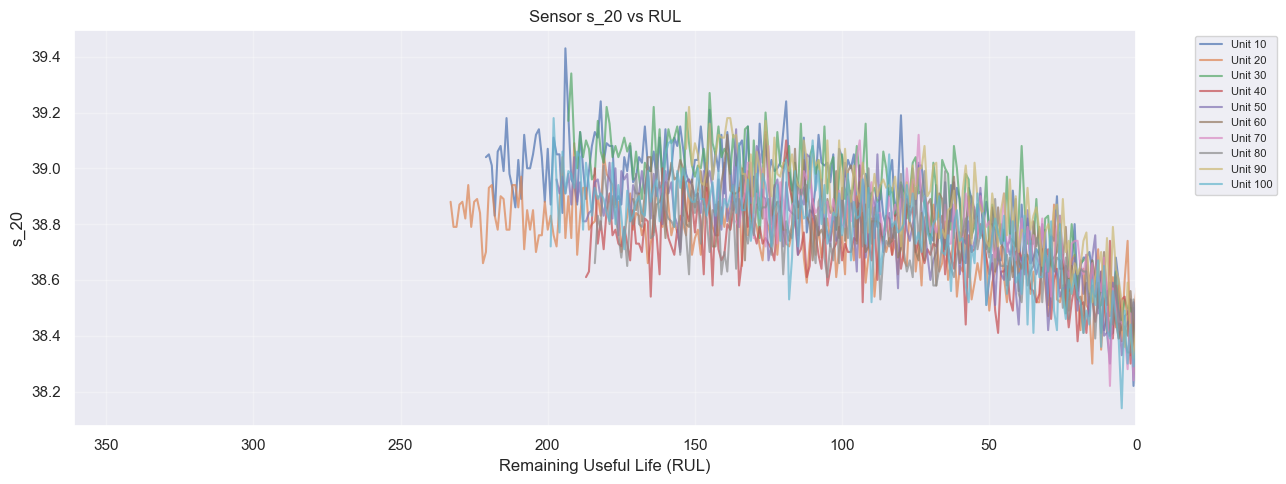

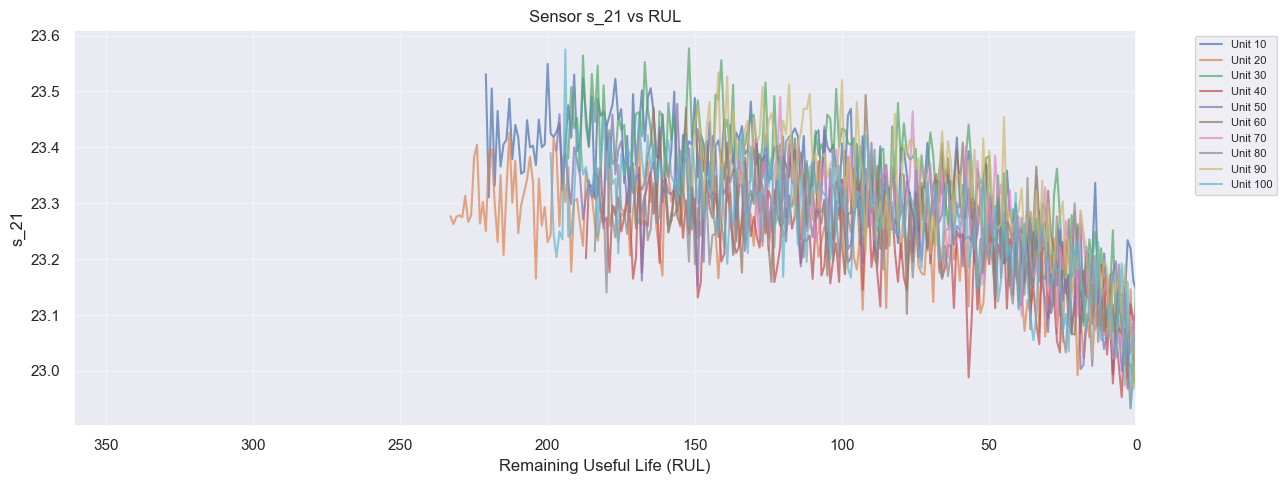

In [114]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in df_train['unit_number'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_number
            data_subset = df_train[df_train['unit_number']==i].sort_values('RUL')
            if len(data_subset) > 0:
                plt.plot(data_subset['RUL'], data_subset[sensor_name], 
                        label=f'Unit {int(i)}', alpha=0.7)
    
    # Set x-axis limits based on actual data range
    max_rul = df_train['RUL'].max()
    min_rul = df_train['RUL'].min()
    plt.xlim(max_rul, min_rul)  # reverse the x-axis so RUL counts down to zero
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Useful Life (RUL)')
    plt.title(f'Sensor {sensor_name} vs RUL')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

for sensor_name in sensor_names:
    plot_sensor(sensor_name)

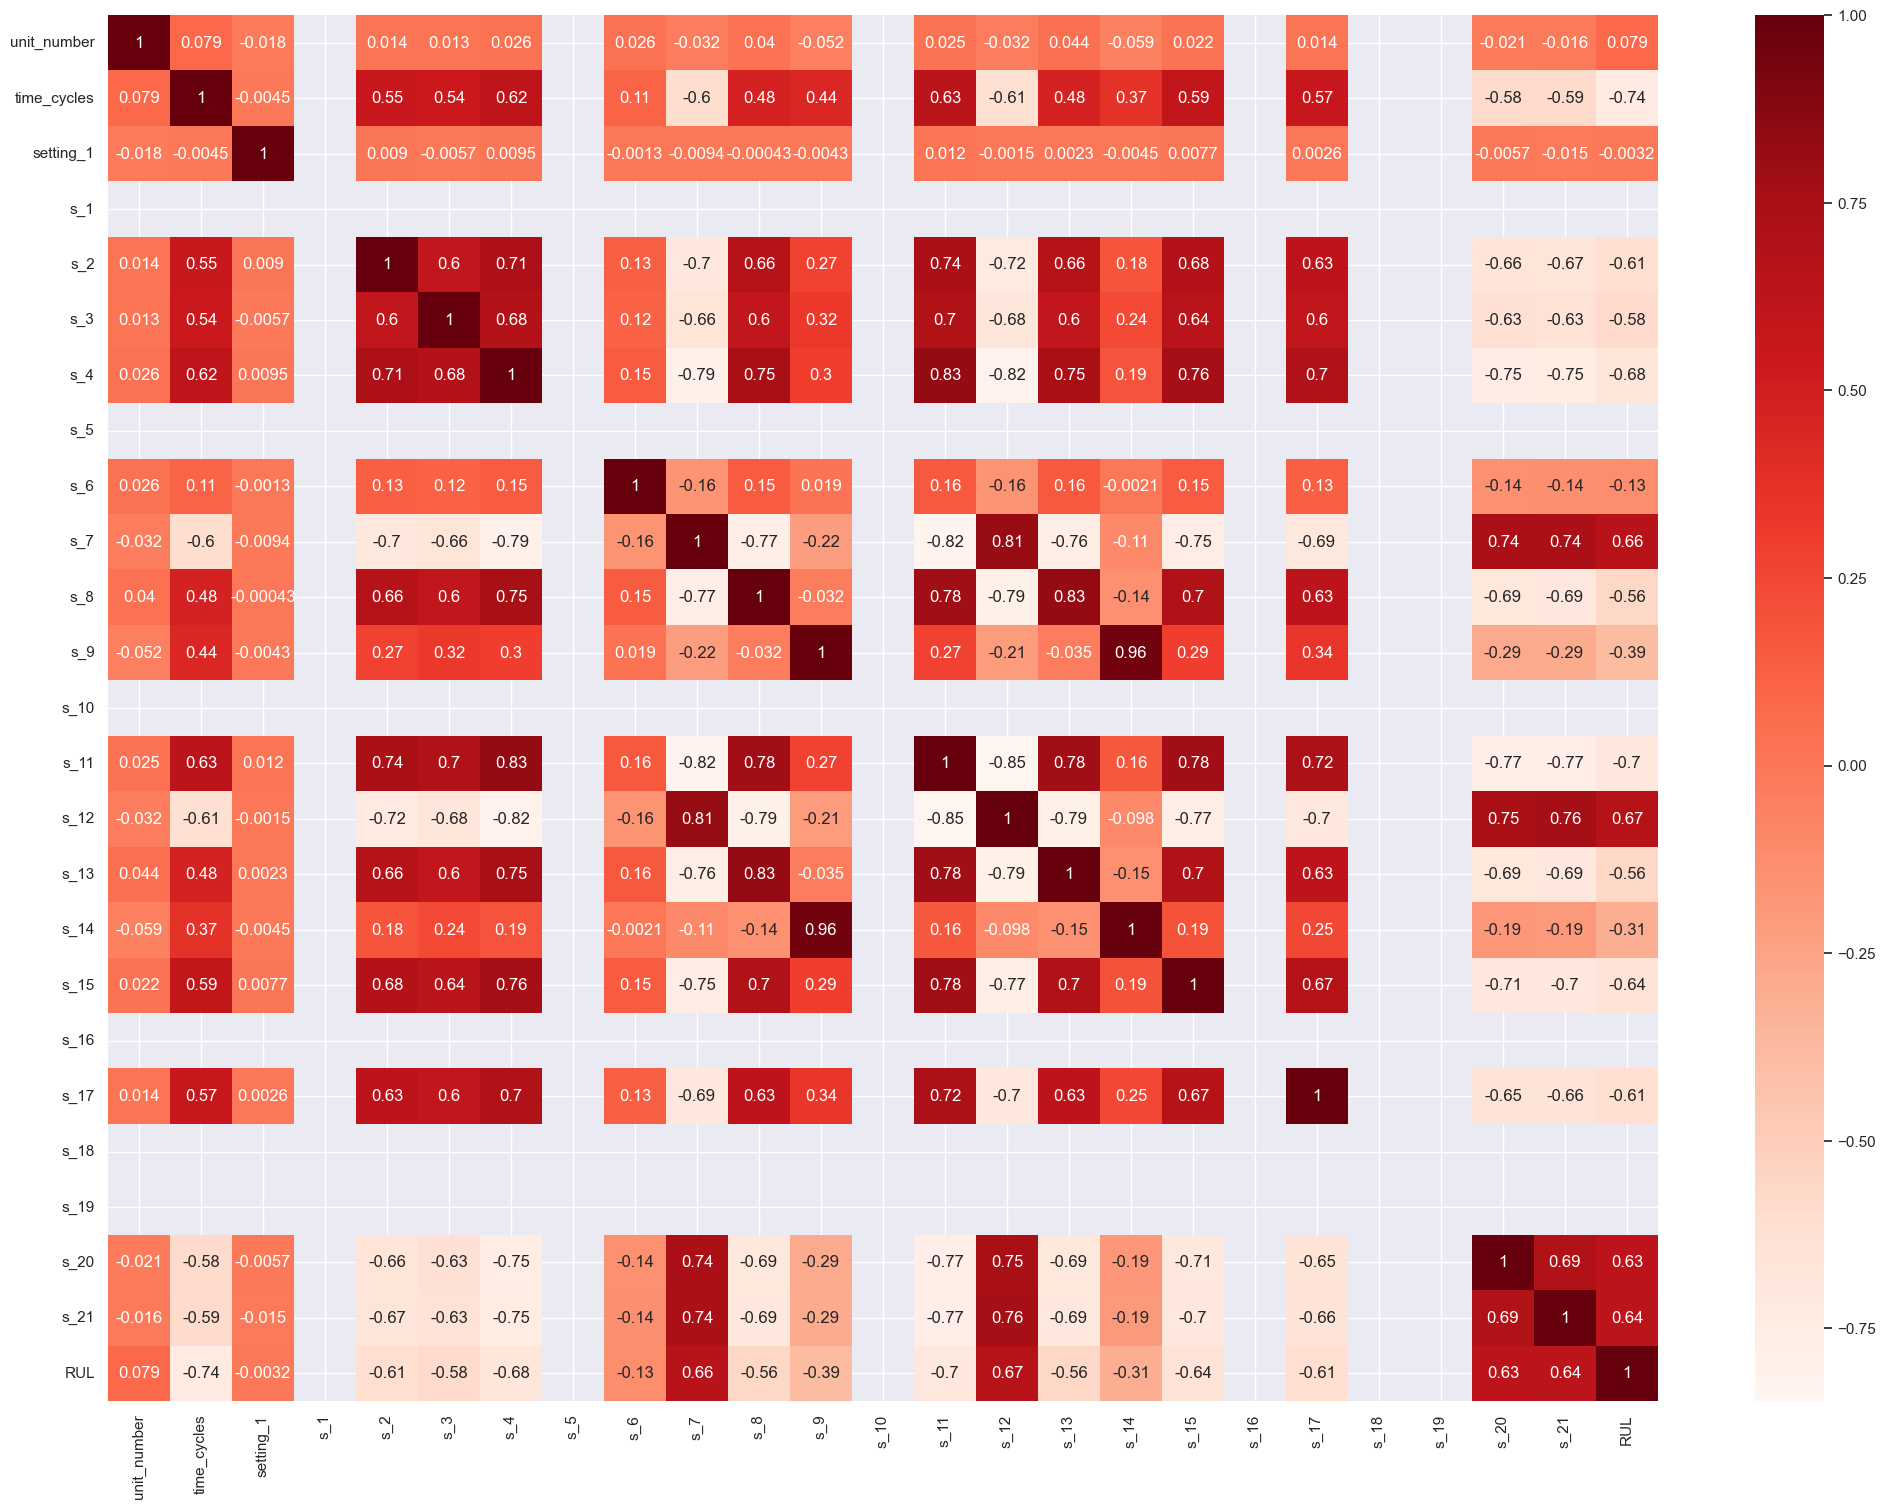

In [115]:
plt.figure(figsize=(25,18))
sns.heatmap(df_train.corr(),annot=True ,cmap='Reds')
plt.show()

In [116]:
cor=df_train.corr()
#Selecting highly correlated features
train_relevant_features = cor[abs(cor['RUL'])>=0.5]
train_relevant_features['RUL']

time_cycles   -0.736241
s_2           -0.606484
s_3           -0.584520
s_4           -0.678948
s_7            0.657223
s_8           -0.563968
s_11          -0.696228
s_12           0.671983
s_13          -0.562569
s_15          -0.642667
s_17          -0.606154
s_20           0.629428
s_21           0.635662
RUL            1.000000
Name: RUL, dtype: float64

In [117]:
list_relevant_features = train_relevant_features.index.tolist()
list_relevant_features

['time_cycles',
 's_2',
 's_3',
 's_4',
 's_7',
 's_8',
 's_11',
 's_12',
 's_13',
 's_15',
 's_17',
 's_20',
 's_21',
 'RUL']

In [118]:
df_train=df_train[list_relevant_features]

df_train.to_csv('../data/processed/train_relevant_features.csv', index=False)

In [119]:
import sys
import os
# Add parent directory to path to import handle_rul
# Since the notebook is in notebooks/ and handle_rul.py is in the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
from handle_rul import add_remaining_useful_life

In [122]:
df_test = pd.read_csv('../data/loaded/test.csv')
df_test = add_remaining_useful_life(df_test)

df_test = df_test.drop('unit_number', axis=1)
df_test = df_test[list_relevant_features]

for col in df_test.columns:
	if df_test[col].dtype != 'float64':
		df_test[col] = df_test[col].astype(float)

df_test.to_csv('../data/processed/test_relevant_features.csv', index=False)
